4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import itertools
%matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv', header=None)
print(df.shape)
df.head()

(699, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
columns = ['sample_id', 'clump_thinkness', 'uniformity_size', 'uniformity_shape', 'marginal_adhesion',
          'epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df.columns = columns
df.head()

,sample_id,clump_thinkness,uniformity_size,uniformity_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?". Question marks will be a problem, so we need to remove them.

In [4]:
#there is a ? at position 23, lets check it
df.iloc[23]

sample_id            1057013
clump_thinkness            8
uniformity_size            4
uniformity_shape           5
marginal_adhesion          1
epithelial_size            2
bare_nuclei                ?
bland_chromatin            7
normal_nucleoli            3
mitoses                    1
class                      4
Name: 23, dtype: object

In [5]:
#replace ?'s with NaN and check to make sure it was replaced
df = df.replace('?', np.nan)
df.iloc[23]

sample_id            1057013
clump_thinkness            8
uniformity_size            4
uniformity_shape           5
marginal_adhesion          1
epithelial_size            2
bare_nuclei              NaN
bland_chromatin            7
normal_nucleoli            3
mitoses                    1
class                      4
Name: 23, dtype: object

In [6]:
#there are only 16 values with NaN so we can likely drop them and not have any major impacts
df = df.dropna()
df.shape

(683, 11)

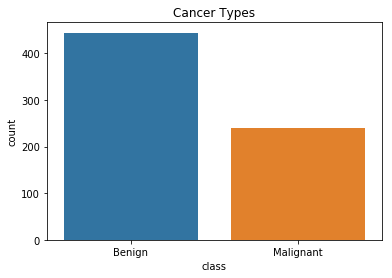

In [7]:
sns.countplot(df['class'])
plt.xticks(np.arange(2), ('Benign', 'Malignant'))
plt.title('Cancer Types')
plt.show()

In [8]:
#change 2 and 4 for benign and mal to 1 and 0

df['class'] = np.where(df['class'] == 2, 0, 1)

In [9]:
X = df.drop('class', 1)
y = df['class']

In [10]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(n_estimators=500)
rfc.fit(X, y)
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

[(0.2426, 'uniformity_size'), (0.2082, 'uniformity_shape'), (0.1698, 'bare_nuclei'), (0.107, 'bland_chromatin'), (0.0826, 'normal_nucleoli'), (0.0804, 'epithelial_size'), (0.0513, 'clump_thinkness'), (0.0327, 'marginal_adhesion'), (0.0191, 'sample_id'), (0.0062, 'mitoses')]


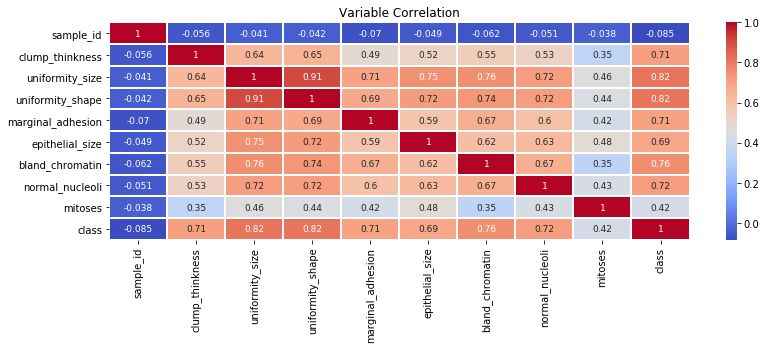

In [11]:
#check for correlation between our features
plt.figure(figsize=(13,4))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

Our features are all fairly correlatted so overfitting could be a major problem. It could be a good idea to run PCA on our data set. Also, sample_id shoudln't have anything to do with whether a cell line is malignant so we can drop that and any feature with importance less than that.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = df.drop(['class', 'sample_id', 'mitoses'], 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

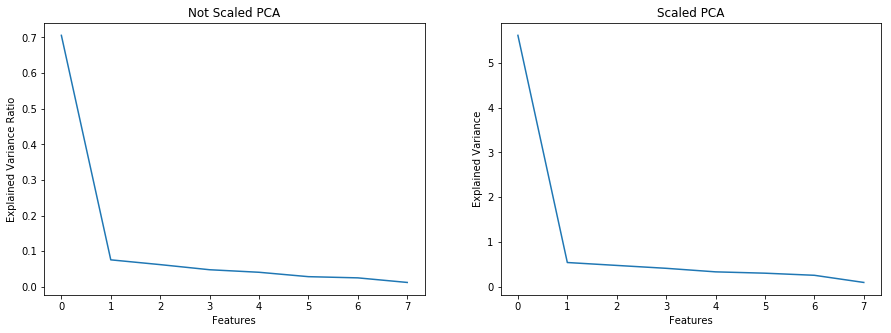

In [14]:
pca = PCA()
pca.fit(X_train)
pca_var = pca.explained_variance_ratio_

pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
pca_scaledvar = pca_scaled.explained_variance_

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(pca_var)
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')
plt.title('Not Scaled PCA')

plt.subplot(1, 2, 2)
plt.plot(pca_scaledvar)
plt.xlabel('Features')
plt.ylabel('Explained Variance')
plt.title('Scaled PCA')

plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
#a function that will help us plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
pca1 = PCA(1)
pca1.fit(X_train)
pca_training = pd.DataFrame(pca1.transform(X_train))
pca_test = pd.DataFrame(pca1.transform(X_test))

In [17]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

X_pca = pca_training.values.reshape(-1, 1)
X_pcatest = pca_test.values.reshape(-1, 1)

rfc = ensemble.RandomForestClassifier(n_estimators=500)
rfc.fit(X_pca, y_train)
y_pred = rfc.predict(X_pcatest)
print('RFC Training Score: ', rfc.score(X_pca, y_train))
print('RFC Training CV Scores: ', cross_val_score(rfc, X_pca, y_train, cv=5))
print('RFC Test Scores: ', rfc.score(X_pcatest, y_test))
print('RFC Test CV Scores: ', cross_val_score(rfc, X_pcatest, y_test, cv=5), '\n')
print('RFC F-Score: ', f1_score(y_test, y_pred))

RFC Training Score:  1.0
RFC Training CV Scores:  [0.97272727 0.95454545 0.96330275 0.97247706 0.90740741]
RFC Test Scores:  0.9562043795620438
RFC Test CV Scores:  [0.96428571 0.96428571 0.92592593 0.92592593 0.96296296] 

RFC F-Score:  0.9347826086956522


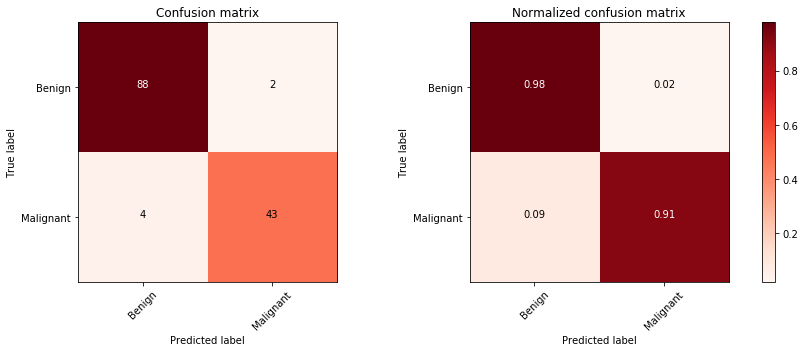

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['Benign', 'Malignant'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['Benign', 'Malignant'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

In [19]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)
print('Training Score: ', logr.score(X_train, y_train))
print('Training CV Scores: ', cross_val_score(logr, X_train, y_train, cv=5), '\n')
print('Test Scores: ', logr.score(X_test, y_test))
print('Test CV Scores: ', cross_val_score(logr, X_test, y_test, cv=5), '\n')
print('F-Score: ', f1_score(y_test, logr_pred))

Training Score:  0.9725274725274725
Training CV Scores:  [0.98 0.95 0.95 0.95 0.97] 

Test Scores:  0.9635036496350365
Test CV Scores:  [0.93 0.89 0.96 0.89 0.96] 

F-Score:  0.9473684210526315


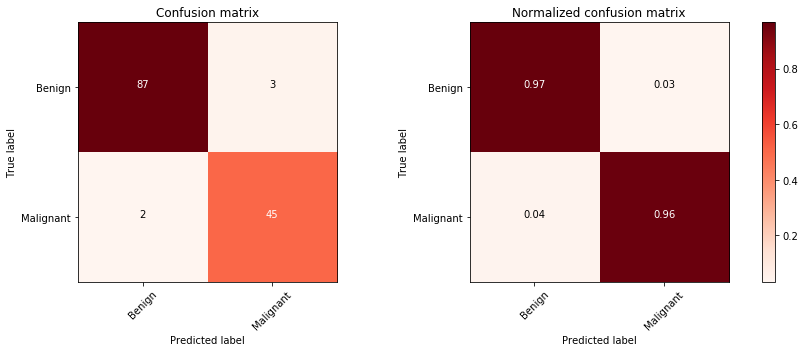

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logr_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cnf_matrix, classes=['Benign', 'Malignant'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(1, 2, 2)
plot_confusion_matrix(cnf_matrix, classes=['Benign', 'Malignant'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()